In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
sns.set(style="darkgrid") 
from scipy.stats import skew

In [2]:
df=pd.read_csv("kidney_data.csv")
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [3]:
insured=df.copy()

In [4]:
insured.head(5)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
insured.tail(5)

,id,gravity,ph,osmo,cond,urea,calc,target
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1
413,413,1.011,6.13,364,9.9,159,0.27,0


In [6]:
insured.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


# observation
1. The average ph of patient is 5.95 and maximum is 7.94
2. The average urea of patient is 278.65 and maximum is 620
3. The average patient with kidney stone is 0.44 and maximum is 1.00

In [7]:
insured.shape

(414, 8)

In [8]:
insured.isnull().sum().values.sum()

0

In [9]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [11]:

print(insured['target'].value_counts())

0    230
1    184
Name: target, dtype: int64


Target=0 [patient donot have kidney stone]
Target=1 [patient has kidney stone]

In [14]:
len(insured[insured['target'] == 0])

230

In [15]:
len(insured[insured['target'] == 1])

184

In [17]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


[]

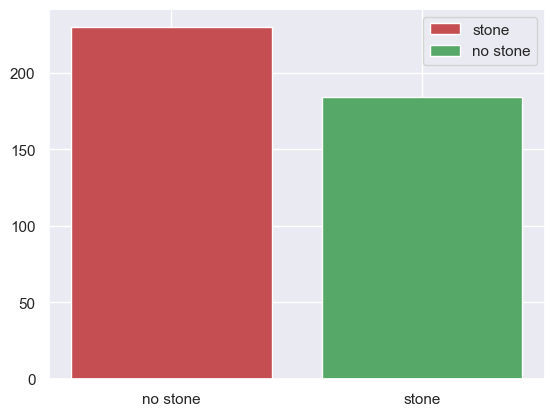

In [24]:
no_of_people_with_stone = len(insured[insured['target'] == 1])
no_of_people_with_nostone = len(insured[insured['target'] == 0])
plt.bar(['no stone','stone'],[no_of_people_with_nostone,no_of_people_with_stone],color = ['r','g'],label = ['stone','no stone'])
plt.legend()
plt.plot()

# Observation

The number of patient with kidney stone is less than patient without kidney stone.

In [12]:
insured.corr()

,id,gravity,ph,osmo,cond,urea,calc,target
id,1.000000,-0.004775,-0.086619,0.008030,0.032843,-0.023822,0.032360,0.018222
gravity,-0.004775,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.086619,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.008030,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.032843,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,-0.023822,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.032360,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.018222,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


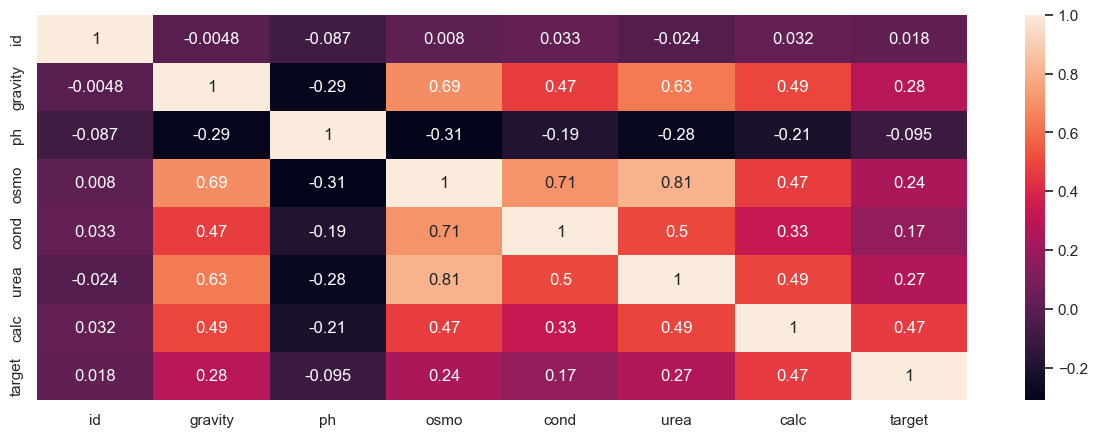

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True)
plt.show()

<Figure size 1000x500 with 0 Axes>

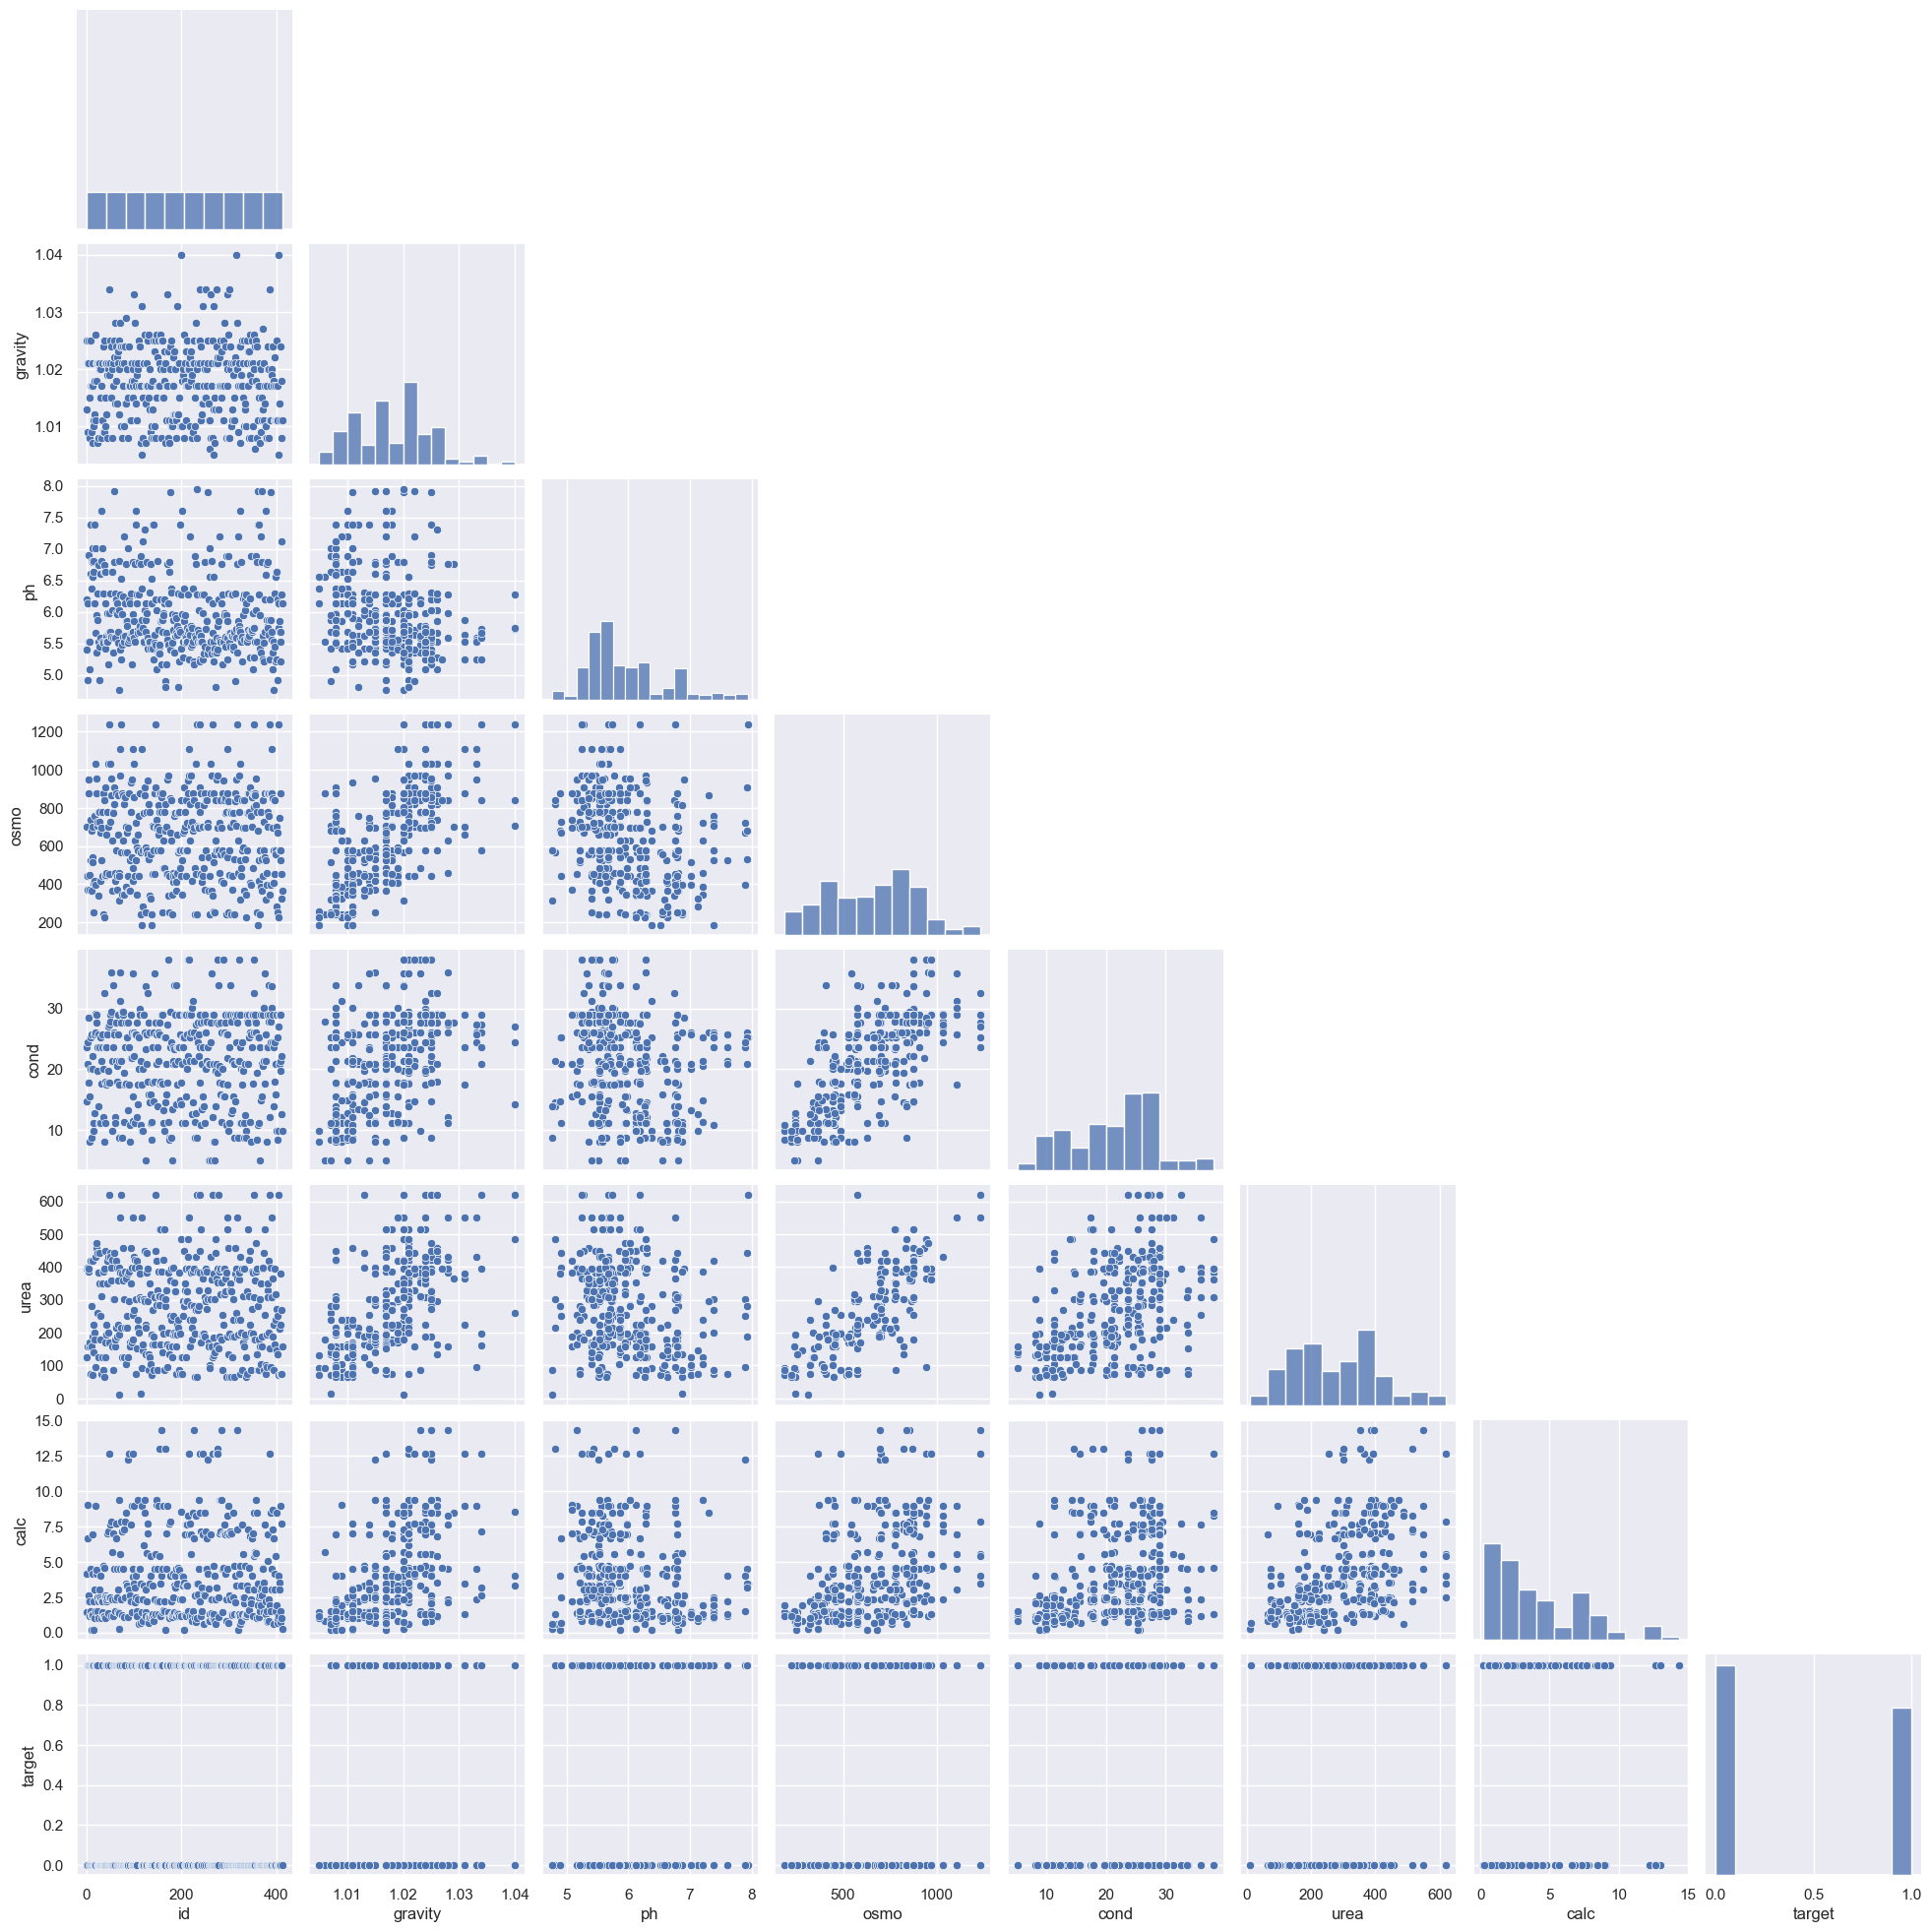

In [23]:
plt.figure(figsize=(10,5))
sns.pairplot(data=insured , corner=True)
plt.show()

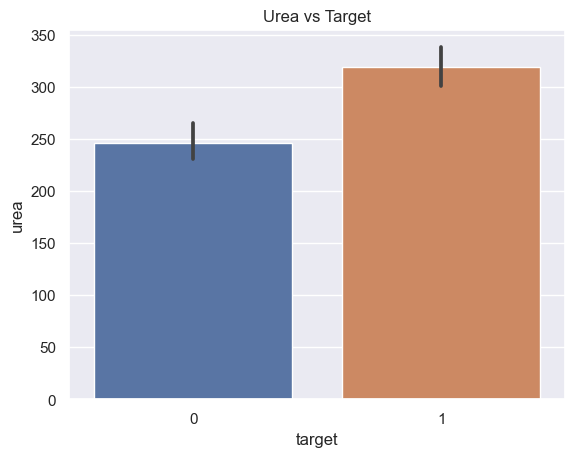

In [21]:
ax = sns.barplot(x=insured.target,y=insured.urea).set(title="Target vs Urea")

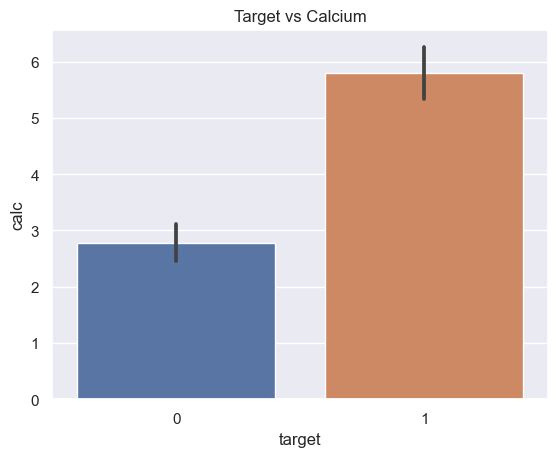

In [22]:
ax = sns.barplot(x=insured.target,y=insured.calc).set(title="Target vs Calcium")

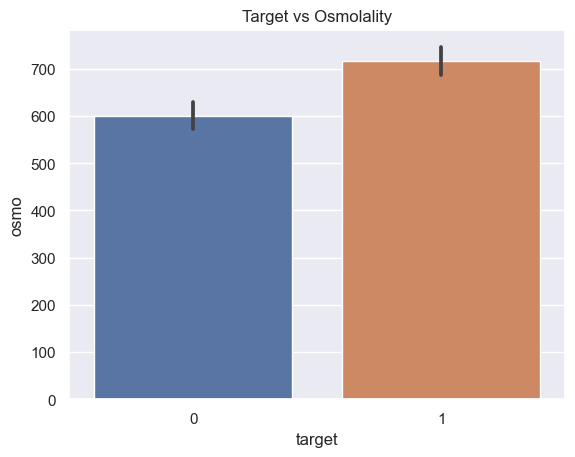

In [25]:
ax = sns.barplot(x=insured.target,y=insured.osmo).set(title="Target vs Osmolality")

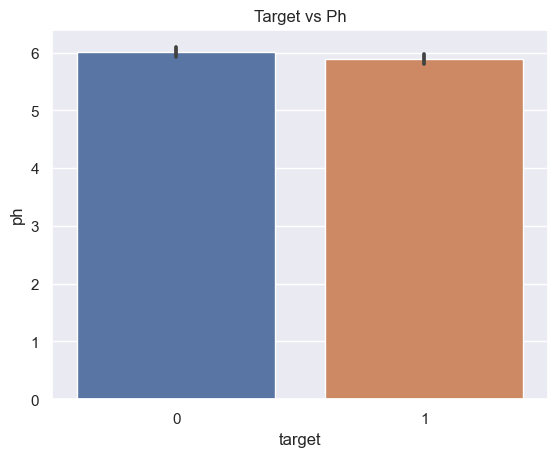

In [26]:
ax = sns.barplot(x=insured.target,y=insured.ph).set(title="Target vs Ph")

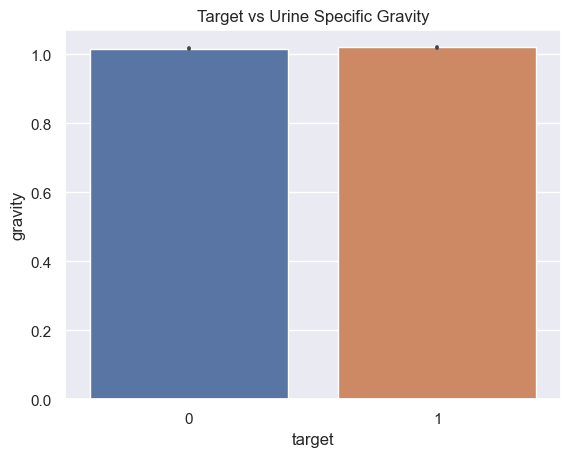

In [27]:
ax = sns.barplot(x=insured.target,y=insured.gravity).set(title="Target vs Urine Specific Gravity")

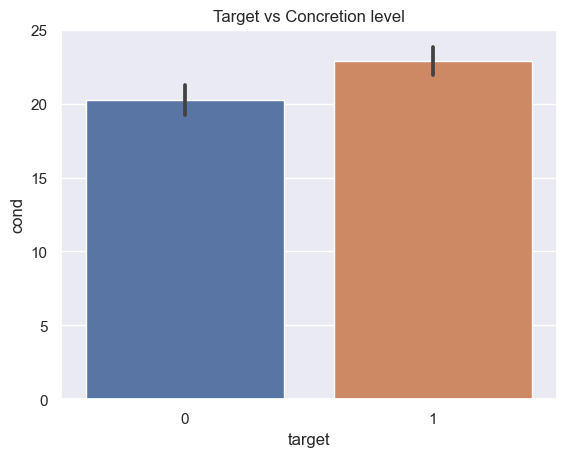

In [29]:
ax = sns.barplot(x=insured.target,y=insured.cond).set(title="Target vs Concretion level")

# Observation

1. The uric acid of patient with no kidney stone is less than the patient with kidney stone.
2. The calcium level of patient with kidney stone is higher than the patient without kidney stone.
